<a href="https://colab.research.google.com/github/ish-war/netflix-movies-shows/blob/main/ishwar_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies & TV Shows Clustering**



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Performed by**    - Ishwar Ambad

# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

* There were approximately 7787 records and 11 attributes in the dataset.

* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

* Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

* The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

* Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

* The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



**Business Context -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


**Problem Statement -**

In this project, you are required to do -


*   Exploratory Data Analysis.
*   Understanding what type content is available in different countries.

*   If Netflix has been increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features.


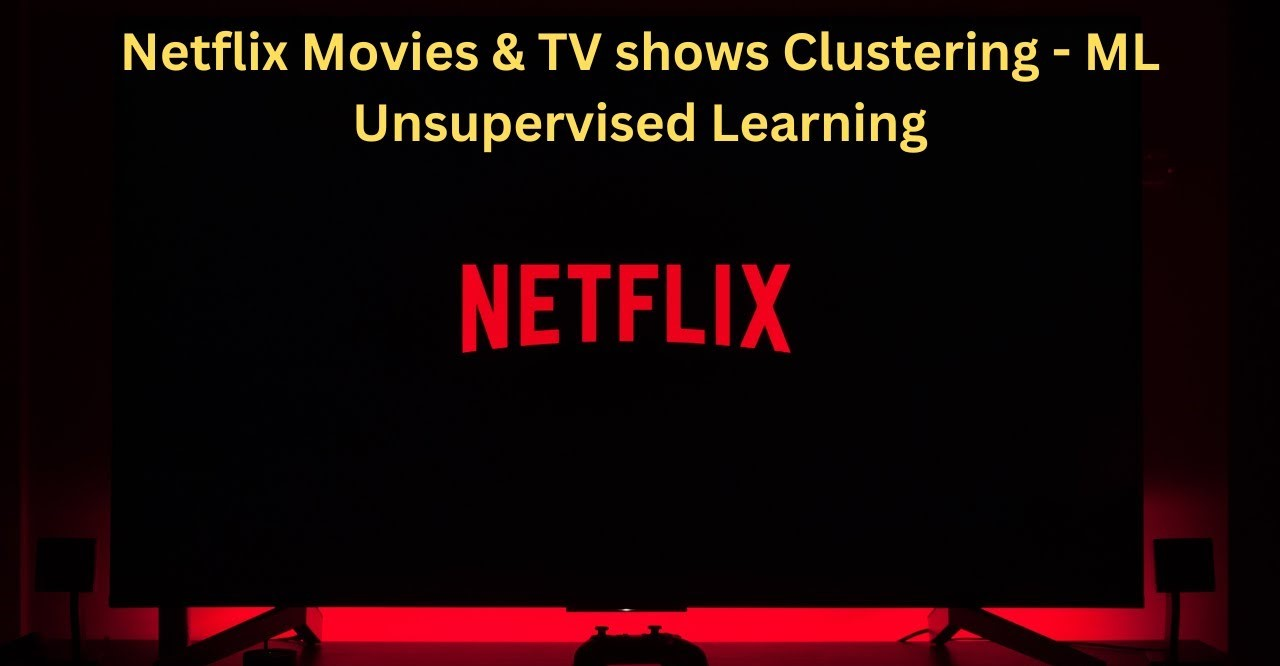



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [104]:
# Import Libraries

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import math
from datetime import datetime
from scipy import stats

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [2]:
# Load Dataset
# mounting the google drive to access the dataset
# from google.colab import drive
# drive.mount('/content/drive')



In [3]:
# loading the dataset
 # df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Dataset First Look
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

In [6]:
# first 5 rows of dataset
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [7]:
# last 5 rows of dataset
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print(f'This dataset has {df.shape[0]} number of rows and {df.shape[1]} number of columns in the dataset.')

This dataset has 7787 number of rows and 12 number of columns in the dataset.


In [9]:
# column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [10]:
# Dataset Info
# ths shows data types and non-null count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [11]:
# investigating summary statistics to understand data distribution
# here we are rounding the decimal value at 2 for better understanding

df.describe(include='all').round(2)

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777       7787.00   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN       2013.93    NaN       NaN   
std               NaN              NaN          8.76    NaN       NaN   
min               NaN              NaN       1925.00    NaN       NaN   
25%               NaN              NaN       2013.00    NaN       NaN   
50%               NaN              NaN       2017.00    NaN       NaN   
75%               NaN              NaN       2018.00    NaN       NaN   
max               NaN              NaN       2021.00    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
duplicates = df.duplicated().sum()
print(f'Number of duplicate values is : {duplicates}')

Number of duplicate values is : 0


#### Missing Values/Null Values

**Why dealing with missing values is necessary?**

There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [13]:
# Missing Values/Null Values Count
# checking the total numbar of null values by getting there SUM

null_values = df.isnull().sum()
sorted_null_values = null_values.sort_values(ascending= False) [0:7]   # by using slicing we are removing other columns with zero null values
sorted_null_values

director      2389
cast           718
country        507
date_added      10
rating           7
show_id          0
type             0
dtype: int64

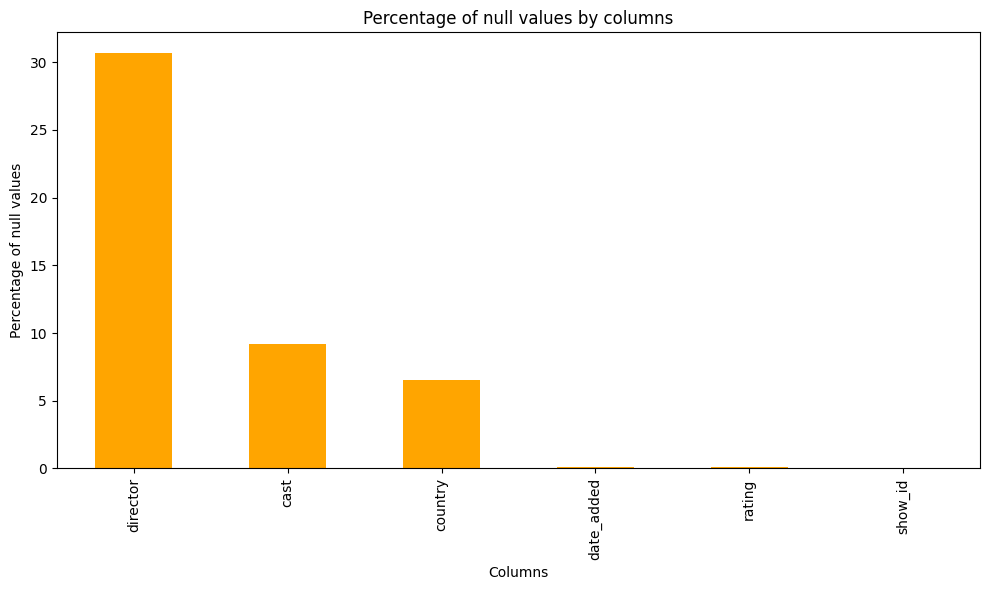

In [14]:
# Visualizing the missing values
# to visualize the missing values we will calculate the percentage  of missing values in each column

null_percent = df.isnull().mean()* 100

# Sort columns based on the percentage of missing values
null_percent = null_percent.sort_values(ascending= False) [0:6]

# creating bar chart for visualization
plt.figure(figsize = (10,6))
df['type'] = df['type'].astype('category')
null_percent.plot(kind = 'bar', color = 'orange')
plt.title("Percentage of null values by columns")
plt.xlabel("Columns")
plt.ylabel("Percentage of null values")
plt.tight_layout()
plt.show()

### What did you know about your dataset?

The given dataset is from the online streaming industry; our task is to examine the dataset, build the clustering methods and content based recommendation system.

Clustering is a technique used in machine learning and data mining to group similar data points together. A clustering algorithm is a method or technique used to identify clusters within a dataset. These clusters represent natural groupings of the data, and the goal of clustering is to discover these groupings without any prior knowledge of the groupings.

* There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.

* Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.

## **Let's make copy of dataset 😍**

In [15]:
# make copy of dataset
df1 = df.copy()

By creating a copy of dataframe we have advantages like -
1. to preserve original data
2. avoid unintended side effects
3. freely modify the data as per our wish

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
df1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
# Dataset Describe
df1.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
for column in df1 :
  unique_val = df1[column].unique()
  print(f"unique values '{column} : {unique_val}")

unique values 'show_id : ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
unique values 'type : ['TV Show', 'Movie']
Categories (2, object): ['Movie', 'TV Show']
unique values 'title : ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
unique values 'director : [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
unique values 'cast : ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
unique value

In [19]:
# to get the number of unique values for each column
for column in df1 :
  num_unique_val = df1[column].nunique(())
  print(f"number of unique values '{column} : {num_unique_val}")

number of unique values 'show_id : 7787
number of unique values 'type : 2
number of unique values 'title : 7787
number of unique values 'director : 4050
number of unique values 'cast : 6832
number of unique values 'country : 682
number of unique values 'date_added : 1566
number of unique values 'release_year : 73
number of unique values 'rating : 15
number of unique values 'duration : 216
number of unique values 'listed_in : 492
number of unique values 'description : 7769


## **3.** ***Data Wrangling***

### **Data Cleaning 😉**
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:

1. Remove duplicate rows.
2. Handling missing values.
3. Convert columns to appropriate datatypes.
4. Adding important columns.

In [159]:
# here we have replaced null values of 2 columns with 'NA'

null_col = ['director', 'cast']
for col in null_col :
  df1[col].fillna('NA', inplace = True)

In [160]:
# here we have replaced nullvalues of the column with the mode value
df1['country'].fillna(value = df1['country'].mode()[0], inplace = True)

# in these 2 columns the null values are negligible so that we can just remove them from the data
df1.dropna(subset = ['date_added', 'rating'], inplace = True)


In [161]:
# making sure that all null values are removed
df1.isnull().sum().sort_values(ascending = False) [:5]

show_id           0
type              0
kmeans_cluster    0
text_data         0
count             0
dtype: int64

### **Duplicate Values**

**How important is it to get rid of duplicate records in my data?**

The mere presence of repeated data in the dataset is referred to as "duplication." This could be caused by incorrect data entry or procedures for collecting data. We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [162]:
# Dataset Duplicate Value Count
duplicates = df1.duplicated().sum()
print(f'Number of duplicate values is : {duplicates}')

Number of duplicate values is : 0


Here, we can see that we do not have any null or duplicate or missing value in our dataset. 😍

### **Create columns**

In [163]:
# creating different columns of TV shows and movies

movies = df1[df1['type'] == 'Movie']
tv_shows = df1[df1['type'] == 'TV Show']

In [164]:
# extracting month from date_added column
df1['month'] = pd.DatetimeIndex(df1['date_added']).month
df1.head()    # here we can see at the end, month column is successfully created

show_id     type  title           director  \
0      s1  TV Show     3%                 NA   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month target_ages  \
0  In a future where the elite inhabit an island ...      8      Adults   
1  After a devastating earthquake hits Mexico Cit...     12      Adults   
2  When an army recruit is found dead, his fellow...     12      Adults   
3  In a postapocalyptic world, rag-doll robots hi...     11       Teens   
4  A brilliant group of students become card-coun...      1       Teens   

   count                                          text_data  kmeans_cluster  \
0      1  najoãomiguelbiancacomparatomichelgomesrodolfov...               0   
1      1  jorgemichelgraudemiánbichirhéctorbonillaoscars...               0   
2      1  gilbertchanteddchanstellachunghenleyhiilawrenc...               2   
3      1  shaneackerelijahwoodjohncreillyjenniferconnell...               0   
4      1  robertluketicjimsturgesskevinspaceykateboswort...               0   

   hierarchical_cluster  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [165]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df1['target_ages'] = df1['rating'].replace(ratings)


### Observations:

* We are focusing on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.
* By utilizing these features, we plan to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
* Additionally, we will be developing a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **What is EDA?**
* EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.


#### Chart - 1 - Which type has more number of shows ?

In [27]:
df1['type'].value_counts()

type
Movie      5372
TV Show    2398
Name: count, dtype: int64

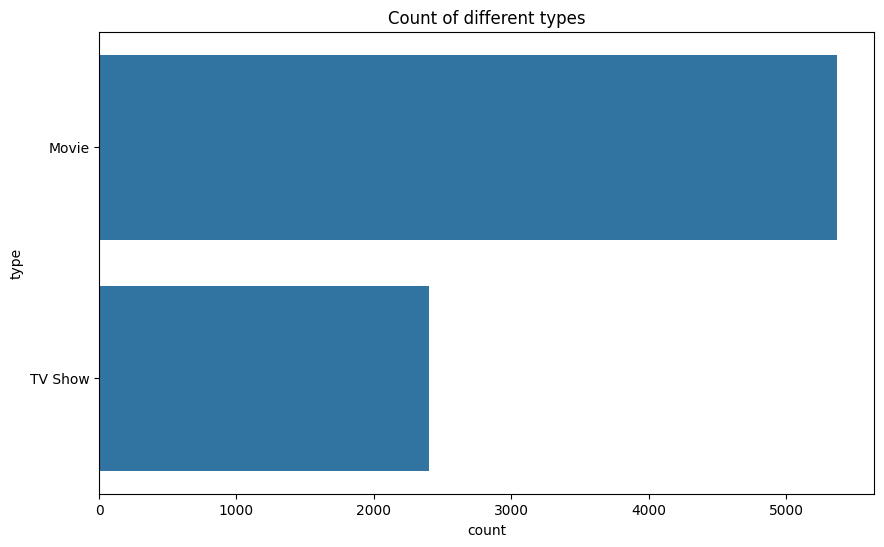

In [28]:
# Chart - 1 visualization code
plt.figure(figsize = (10,6))
sns.countplot(df1['type'])
plt.title('Count of different types')
plt.xlabel('count')
plt.ylabel('type')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot takes only one variable as input and it specifically shows the total number of shows for different types.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can see that the total number of moveis is greater than the number of TV shows. The total count of movies is 5372 and the total count of TV shows is 2398.

#### Chart - 2 - Which year has the most number of releases ?

In [29]:
year_count = df1['release_year'].value_counts()
year_count.sort_values(ascending = False)

release_year
2018    1120
2017    1010
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: count, Length: 73, dtype: int64

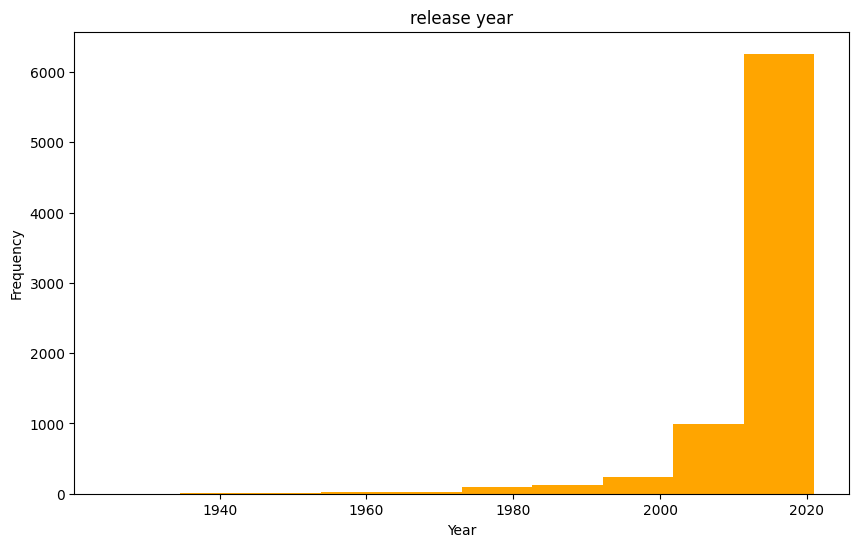

In [30]:
# Chart - 2 visualization code

plt.figure(figsize = (10,6))
df1['release_year'].plot(kind = 'hist', bins = 10, title = 'release year', color = 'orange')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I have used histogram because it automatically group data into bins, which can be helpful when dealing with continuous data such as years. Each bar in the histogram represents the number of shows released within a specific range of years.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can conclude that between the years 2010 - 2020, maximum number of movies and TV shows are released. To be specific, year 2018 has the highest number of release which is 1120 followed by year 2017.

#### Chart - 3 - Compare the releases of movies and tv shows over years ?

In [31]:
# count of movies for each release year
movies_year = movies['release_year'].value_counts().sort_index(ascending = False)

# count of tv shows for each year
tv_shows_year = tv_shows['release_year'].value_counts().sort_index(ascending = False)

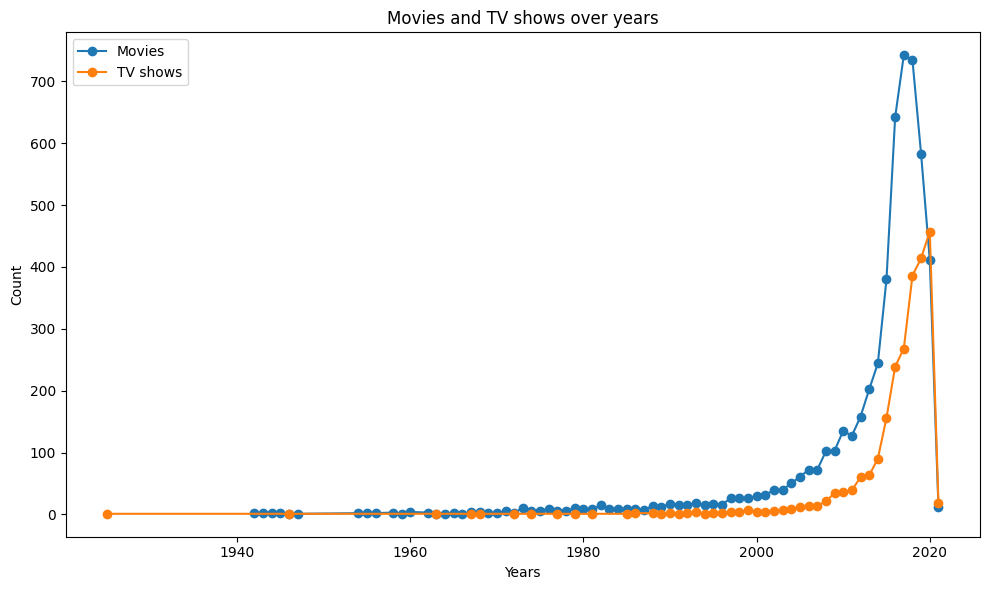

In [32]:
# Chart - 3 visualization code
plt.figure(figsize = (10,6))
plt.plot(movies_year.index, movies_year.values, marker='o', label='Movies')
plt.plot(tv_shows_year.index, tv_shows_year.values, marker= 'o', label= 'TV shows')
plt.title('Movies and TV shows over years')
plt.xlabel('Years')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are excellent for showing trends over time. By plotting the counts of movies and TV shows across years, we can easily observe how the number of releases has changed over time. Line charts allow for a clear comparison between two or more datasets.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that the release of TV shows are started quite earlier than the movies but later, specifically after year 1995 we see steadily rise in the number of movies as compared to TV shows.

#### Chart - 4 - How many movies are released per year in last 20 years ?

In [33]:
# count of movies per year
movies_year[0:20].sort_values(ascending = False)

release_year
2017    742
2018    734
2016    642
2019    582
2020    411
2015    380
2014    244
2013    202
2012    158
2010    135
2011    127
2009    103
2008    102
2007     72
2006     72
2005     61
2004     50
2003     40
2002     39
2021     12
Name: count, dtype: int64

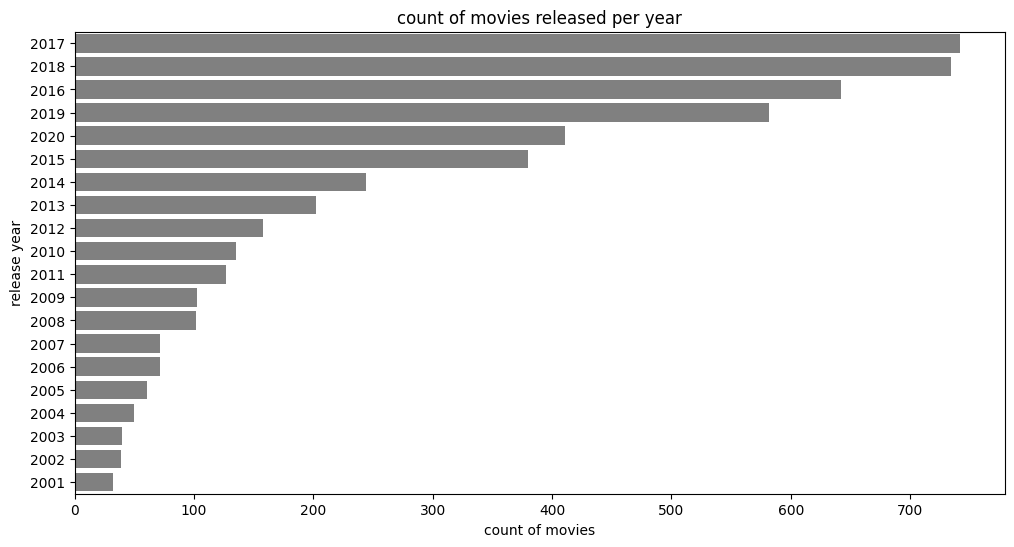

In [34]:
# Chart - 4 visualization code

plt.figure(figsize = (12,6))
sns.countplot(y = movies['release_year'], data = df1, order = movies['release_year'].value_counts().index[0:20], color = 'grey' )
plt.title('count of movies released per year')
plt.xlabel('count of movies')
plt.ylabel('release year')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot counts the values and shows them in bar which is easy to understand and gain insight from them.

##### 2. What is/are the insight(s) found from the chart?

This countplot shows the number of movies released per year. From the graph we can easily say that in year 2017 highest number of movies are released that is 742 followed by year 2018 and year 2001 has the lowest number of movies released.

#### Chart - 5 What is the count of released TV shows per year for last 20 years ?

In [35]:
# count of tv shows for last 20 years
tv_shows_year[0:20].sort_values(ascending = False)

release_year
2020    457
2019    414
2018    386
2017    268
2016    239
2015    156
2014     90
2013     63
2012     60
2011     39
2010     36
2009     34
2008     22
2021     19
2007     13
2006     13
2005     12
2004      9
2003      7
2002      6
Name: count, dtype: int64

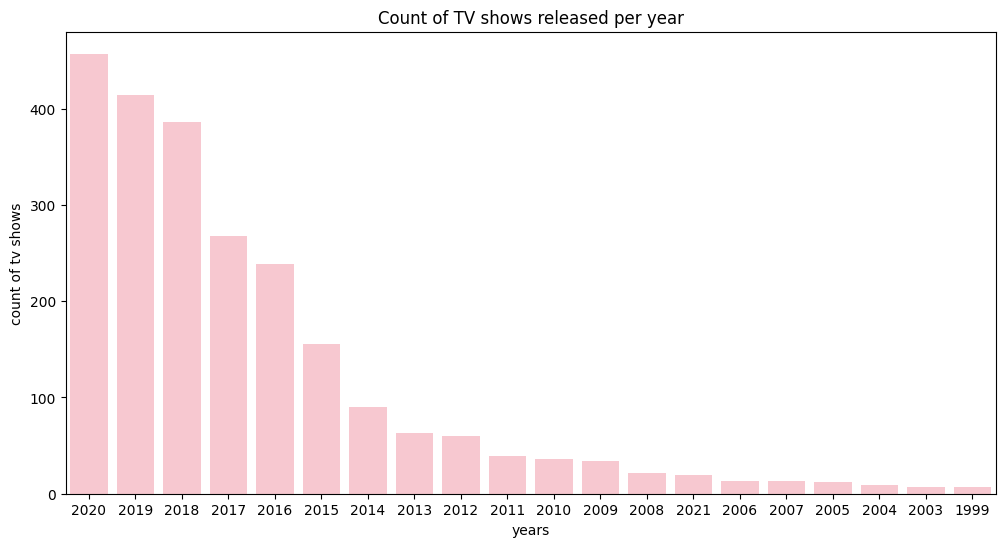

In [36]:
# Chart - 5 visualization code

plt.figure(figsize = (12,6))
sns.countplot(x = tv_shows['release_year'], data = df1, order = tv_shows['release_year'].value_counts().index[0:20],color = 'pink')
plt.title('Count of TV shows released per year')
plt.xlabel('years')
plt.ylabel('count of tv shows')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot counts the values and shows them in bar which is easy to understand and gain insight from them.

##### 2. What is/are the insight(s) found from the chart?

This countplot shows the number of TV shows released per year. From the graph we can easily say that in year 2020 highest number of shows are released that is 457 followed by year 2019 and year 1999 has the lowest number of TV shows released.

#### Chart - 6 - What are the top 10 countries with the most number of movies and TV shows ?

In [37]:
# top 10 countries with the most number of movies and TV shows
top_10_countries = df1['country'].value_counts()[0:10]
top_10_countries

country
United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: count, dtype: int64

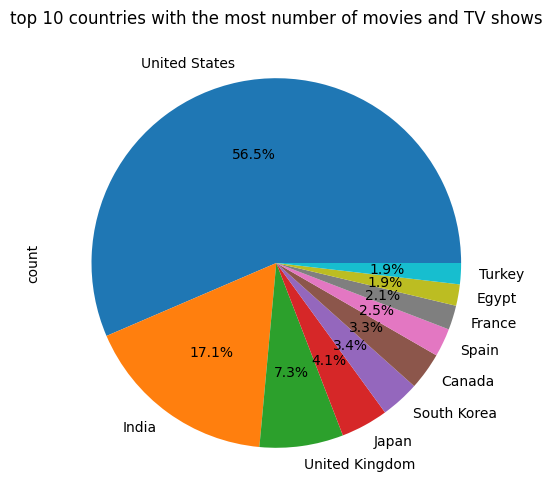

In [38]:
# Chart - 6 visualization code
plt.figure(figsize = (10,6))
df1['country'].value_counts().head(10).plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('top 10 countries with the most number of movies and TV shows')
plt.show ()

##### 1. Why did you pick the specific chart?

Pie charts are ideal for representing parts of a whole. They visually display the proportionate contribution of each category to the total, making it easy to see how each category relates to the entire dataset. Each category is represented by a slice of the pie, and the size of each slice directly corresponds to the proportion it represents.

##### 2. What is/are the insight(s) found from the chart?

From the above pie diagram we can conclude that United States has the highest number of movies and TV shows followed by India. Both countries are famous for their respective film industries. From the chart we can easily tell top 10 countries with highest number and their corresponding percentage.

#### Chart - 7 - What is the most common genre in the dataset ?

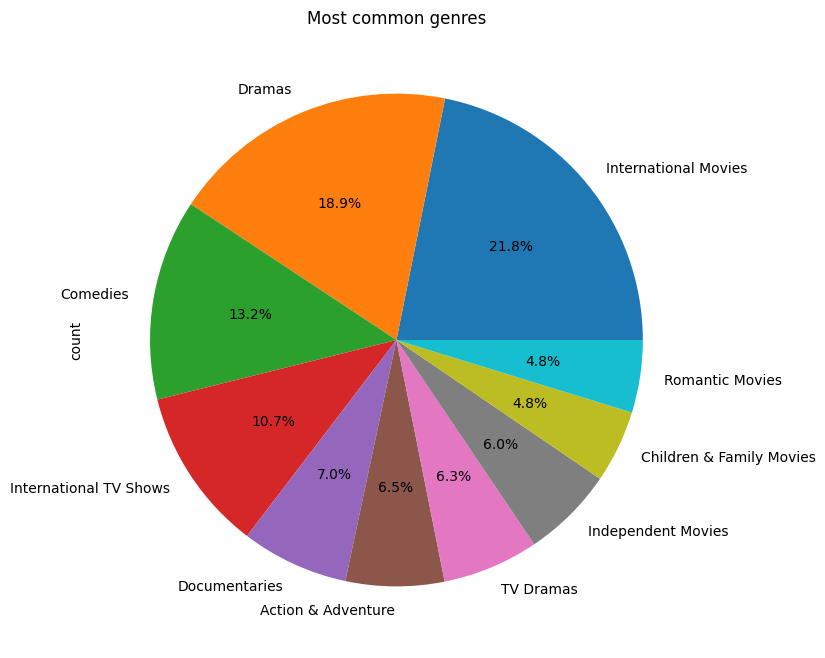

In [39]:
# Chart - 7 visualization code
plt.figure(figsize = (10,8))
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='pie', autopct = '%1.1f%%')
plt.title('Most common genres')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts effectively represent proportions or percentages of a whole. Each slice of the pie corresponds to a portion of the total, allowing viewers to see at a glance how each category contributes to the whole.

##### 2. What is/are the insight(s) found from the chart?

From the pie diagram we can conclude hat the most common 3 genres are international movies, dramas and comedies. The genres with lowest contribution are children, family movies and romantic movies. International TV shows is at the four number.

#### Chart - 8 - What is the distribution of ratings ?

In [40]:
# distribution of ratings
df['rating'].value_counts()

rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

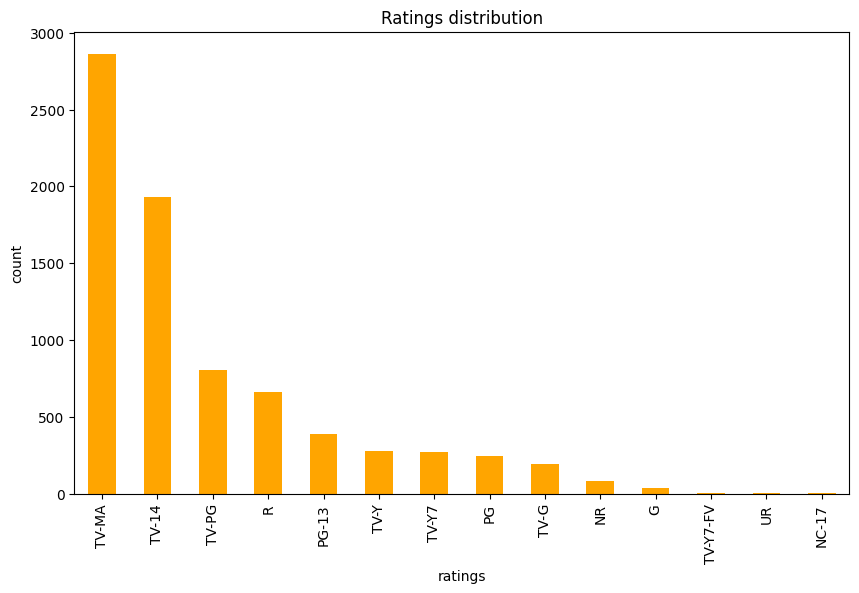

In [41]:
# Chart - 8 visualization code
plt.figure(figsize = (10,6))
df['rating'].value_counts().plot(kind='bar', title = 'Ratings distribution', color = 'orange')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are excellent for comparing categories or groups of data. The length or height of the bars directly represents the value of each category, making it easy to see which category is the largest or smallest. The simplicity of the bars makes it easy to understand the relationships between different data points.

##### 2. What is/are the insight(s) found from the chart?

From the above bar we can simply tell that TV-MA ratig has the highst count followed by TV-14. Ratings NC-17 and UR has the lowest count.

#### Chart - 9 - What is the count of monthly release of TV shows and movies ?

In [42]:
# count of monthly release
df1['month'].value_counts()

month
12    832
10    785
1     756
11    738
3     668
9     618
8     617
7     600
4     600
5     543
6     542
2     471
Name: count, dtype: int64

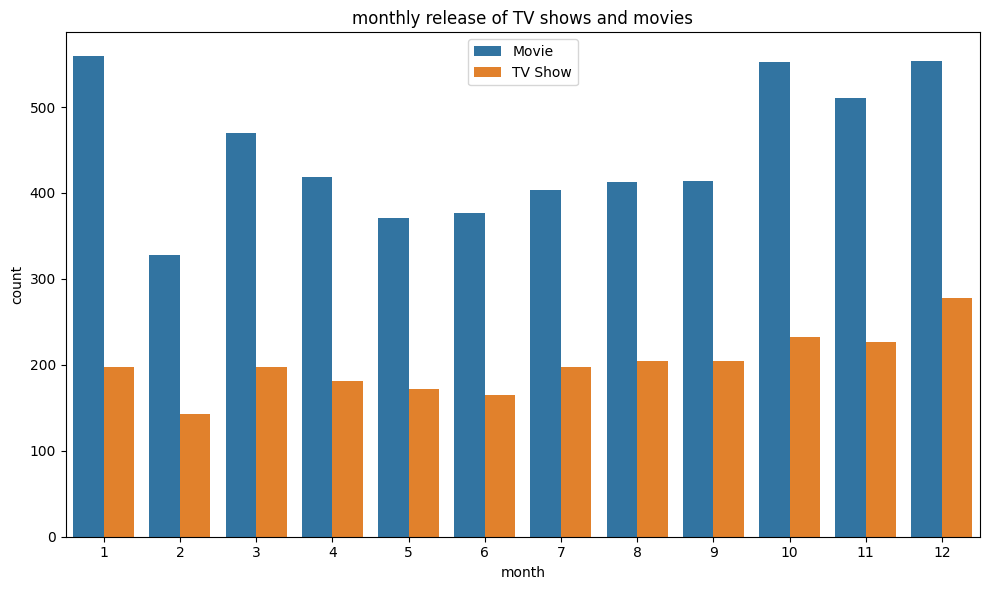

In [43]:
# Chart - 9 visualization code
plt.figure(figsize = (10,6))
sns.countplot(x = 'month', hue = 'type', data = df1)
plt.title('monthly release of TV shows and movies')
plt.xlabel('month')
plt.ylabel('count')
plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Countplot display the frequency of each category in a categorical variable, providing a clear representation of the distribution of data.
Countplot counts the values and shows them in bar which is easy to understand and gain insight from them.

##### 2. What is/are the insight(s) found from the chart?

Here we can see the highest release in the year of December followed by the October. The highest number of movies released is in the month of January and highest number of TV shows are in the month of December.

#### Chart - 10 - What is the rating of tv shows ?

In [44]:
# Rating based on rating system of all TV Shows
tv_shows.groupby(['rating'])['show_id'].count()

rating
NR             4
R              2
TV-14        656
TV-G          83
TV-MA       1016
TV-PG        299
TV-Y         162
TV-Y7        175
TV-Y7-FV       1
Name: show_id, dtype: int64

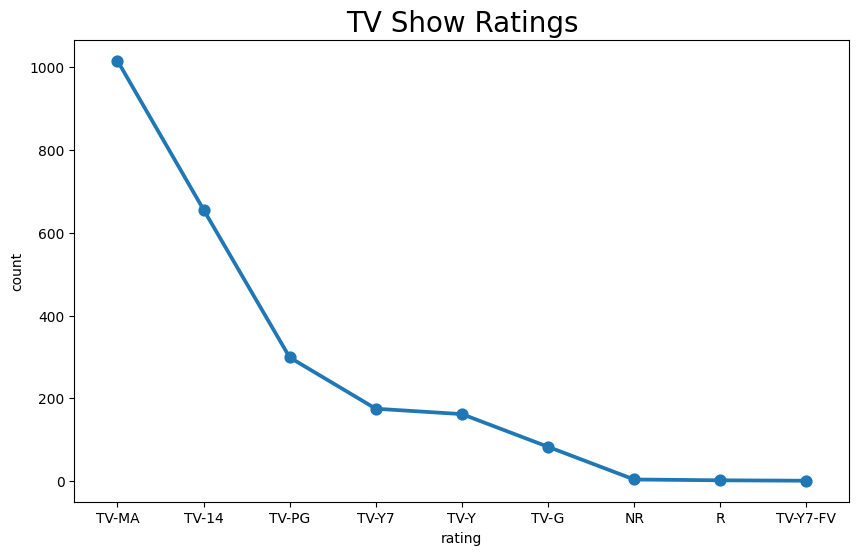

In [45]:
# Chart - 10 visualization code

tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

##### 1. Why did you pick the specific chart?

 Point plots allow for the quick identification of trends or patterns in the data. By plotting individual data points, you can easily observe relationships between variables, such as correlation or clustering.

##### 2. What is/are the insight(s) found from the chart?

From chart we can see that TV-MA has the highest count out of all other ratings. TV-Y7-FV has the lowest count of ratings.

#### Chart - 11 -  What is top 10 genre of the movies in the dataset ?

In [46]:
# Analysing top10 genre of the movies
movies['listed_in'].value_counts()[0:10]

listed_in
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Dramas, International Movies, Romantic Movies       153
Name: count, dtype: int64

<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

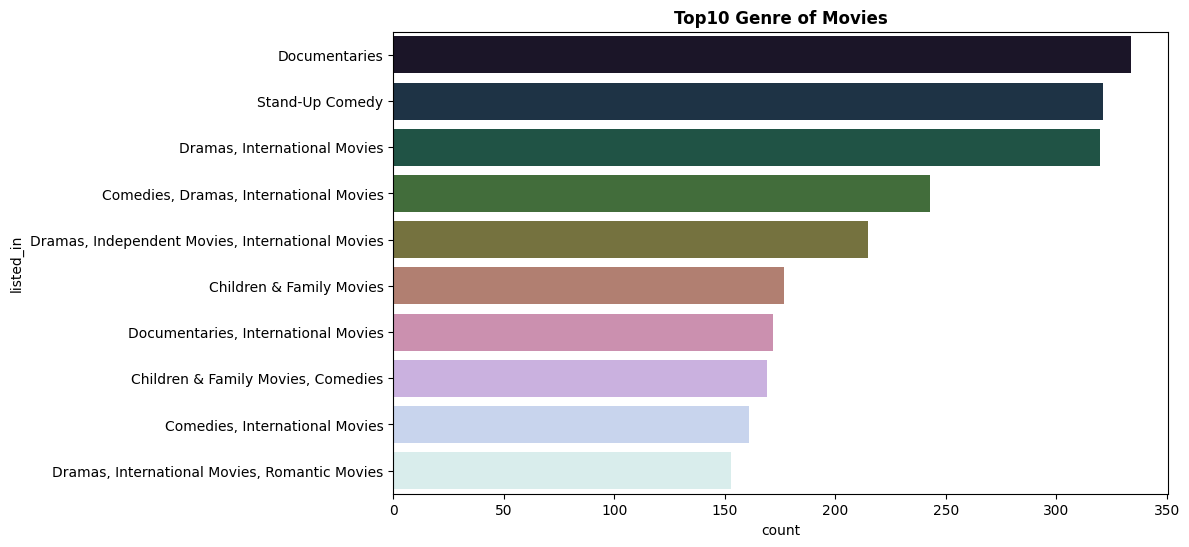

In [47]:
# Chart - 11 visualization code

plt.figure(figsize=(10,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],palette="cubehelix")

##### 1. Why did you pick the specific chart?

Countplot display the frequency of each category in a categorical variable, providing a clear representation of the distribution of data. Countplot counts the values and shows them in bar which is easy to understand and gain insight from them.

##### 2. What is/are the insight(s) found from the chart?

The above countplot gives top 10 genres for movies. The genre with the highest count is documentaries foloowedby stand-up comedy. Here we can see that international movies and romantic movies has the lowest count.

#### Chart - 12 - What are the top 10 genres for the TV shows ?

In [48]:
#Analysing top10 genres of TVSHOWS
tv_shows['listed_in'].value_counts()[0:10]

listed_in
Kids' TV                                                      204
International TV Shows, TV Dramas                             111
Crime TV Shows, International TV Shows, TV Dramas             106
Kids' TV, TV Comedies                                          88
International TV Shows, Romantic TV Shows, TV Dramas           86
Reality TV                                                     83
International TV Shows, Romantic TV Shows, TV Comedies         79
Anime Series, International TV Shows                           74
Docuseries                                                     73
International TV Shows, Korean TV Shows, Romantic TV Shows     65
Name: count, dtype: int64

<Axes: title={'center': 'Top10 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

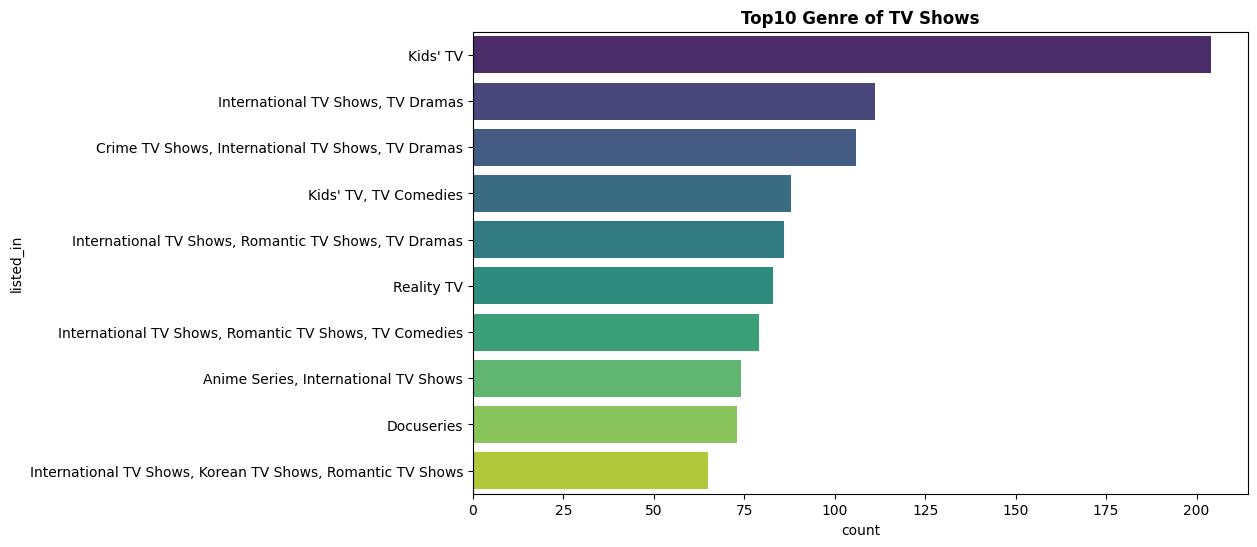

In [49]:
# Chart - 12 visualization code

plt.figure(figsize=(10,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10],palette="viridis")

##### 1. Why did you pick the specific chart?

Countplot display the frequency of each category in a categorical variable, providing a clear representation of the distribution of data. Countplot counts the values and shows them in bar which is easy to understand and gain insight from them.

##### 2. What is/are the insight(s) found from the chart?

The above countplot gives top 10 genres for TV shows. The genre with the highest count is kids TV foloowedby International TV shows, TV dramas. Here we can see that international TV shows, korean TV shows and romantic TV shows has the lowest count.

#### Chart - 13 -  In which countries netflix is the most popular ?

In [50]:
#top_two countries where netflix is most popular

country=df['country'].value_counts().reset_index()[:10]
country


country  count
0   United States   2555
1           India    923
2  United Kingdom    397
3           Japan    226
4     South Korea    183
5          Canada    177
6           Spain    134
7          France    115
8           Egypt    101
9          Turkey    100

<BarContainer object of 11 artists>

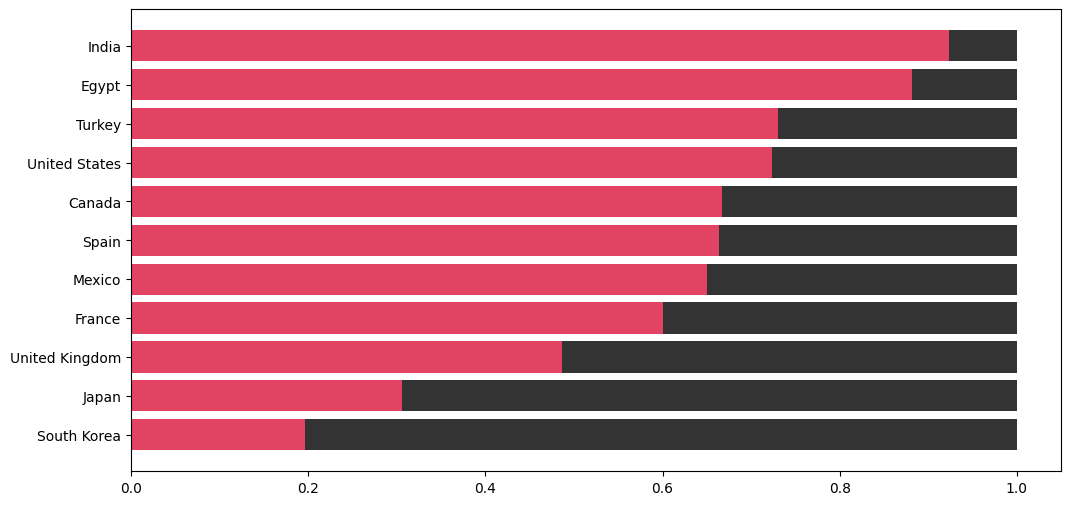

In [51]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split

country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')

##### 1. Why did you pick the specific chart?

Bar charts are excellent for comparing categories or groups of data. The length or height of the bars directly represents the value of each category, making it easy to see which category is the largest or smallest. The simplicity of the bars makes it easy to understand the relationships between different data points.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that India and Egypt has highest number of movies and less number of tv shows. And Japan & South Korea has most tv shows and less number of movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is scope for tv shows India, Egypt and in Japan, South Korea there is scope for movies. Uniked Kingdom on the other has approximately equal number of movies and tv shows.


#### Chart - 14 - Correlation Heatmap

In [52]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df1['target_ages'] = df1['rating'].replace(ratings)


In [53]:
# Preparing data for heatmap
df1['count'] = 1
data = df1['country'][:11]


df_heatmap = df1.loc[df1['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap



country        Brazil     Egypt     India  Mexico  Singapore  Turkey  \
target_ages                                                            
Adults       0.680556  0.277228  0.255688    0.77   0.260870    0.53   
Kids         0.083333  0.000000  0.016251    0.02   0.000000    0.01   
Older Kids   0.111111  0.039604  0.160347    0.07   0.086957    0.10   
Teens        0.125000  0.683168  0.567714    0.14   0.652174    0.36   

country      United States  
target_ages                 
Adults            0.471976  
Kids              0.089479  
Older Kids        0.195346  
Teens             0.243199

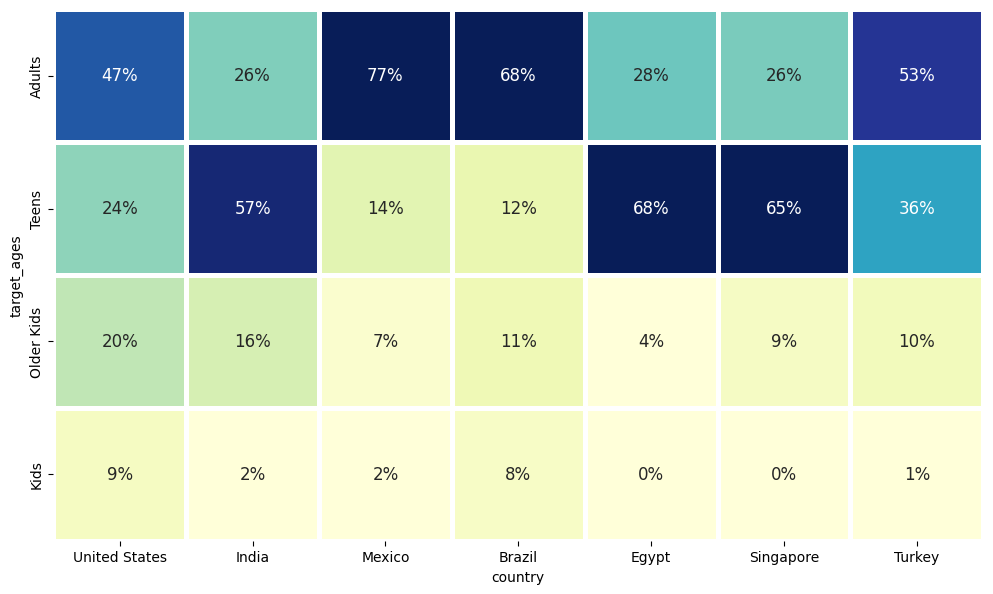

In [54]:
# Correlation Heatmap visualization code
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'Mexico', 'Brazil', 'Egypt', 'Singapore', 'Turkey']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps excel at revealing patterns and trends in large datasets with two numerical dimensions. By representing values as colors, they allow you to quickly grasp how values are distributed across different categories. Heatmaps can effectively highlight clusters of data points with similar values.

##### 2. What is/are the insight(s) found from the chart?

In United States, highest targeted age is of adults. For India targeted age is of teens. India, Egypt, Singapore are somewhat similar in their targeted age groups. Mexico and brazil are highly concentrated on adult age with 77%. Kids section is the least targeted age group by all countries.

#### Chart - 15 - Pair Plot

<Figure size 800x1400 with 0 Axes>

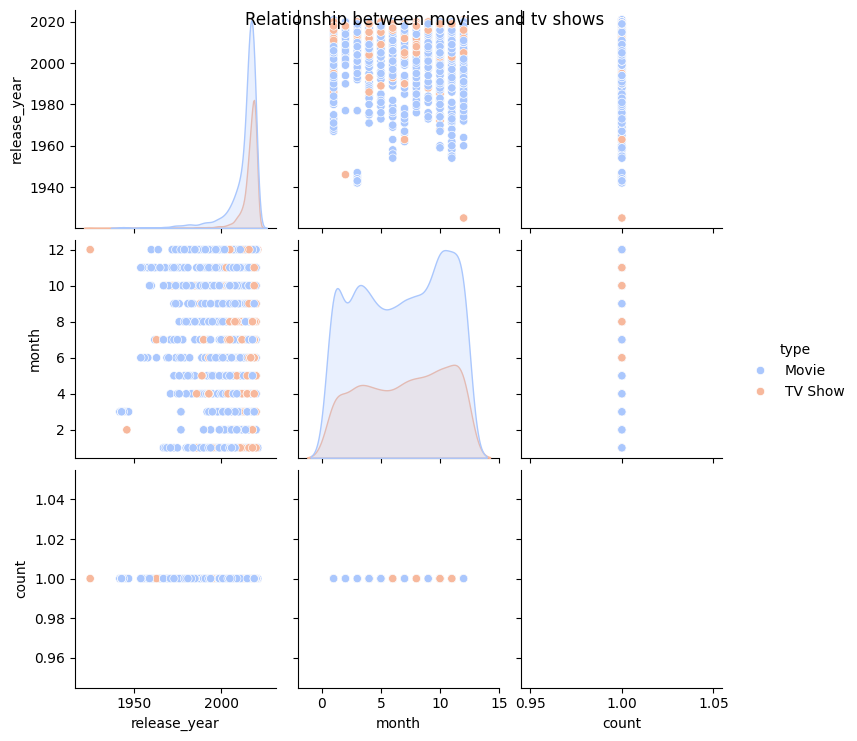

In [55]:
# Pair Plot visualization code
plt.figure(figsize = (8,14))
sns.pairplot(df1, hue = 'type', palette = 'coolwarm')
plt.suptitle('Relationship between movies and tv shows')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot creates a matrix of scatter plots, allowing to see the relationship between every numerical variable in your dataset at once.  This comprehensive view helps identify potential linear or non-linear relationships that might not be evident from examining individual scatter plots.

##### 2. What is/are the insight(s) found from the chart?

This pairplot shows the relationship between movies and tv shows and their count, monthly release and yearly release relation with each other. From the graph we can conclude that monthly release of movies is a lot higher as compared to the tv shows. Also we can say that the most of the tv shows are released in the last decade of the dataset.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [56]:
# Handling Missing Values & Missing Value Imputation
df1.isnull().sum()[:5]

show_id     0
type        0
title       0
director    0
cast        0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Here we can see that there are no missing values in the dataset. We have already dealed with the missing values.

### 2. Handling Outliers

<Axes: >

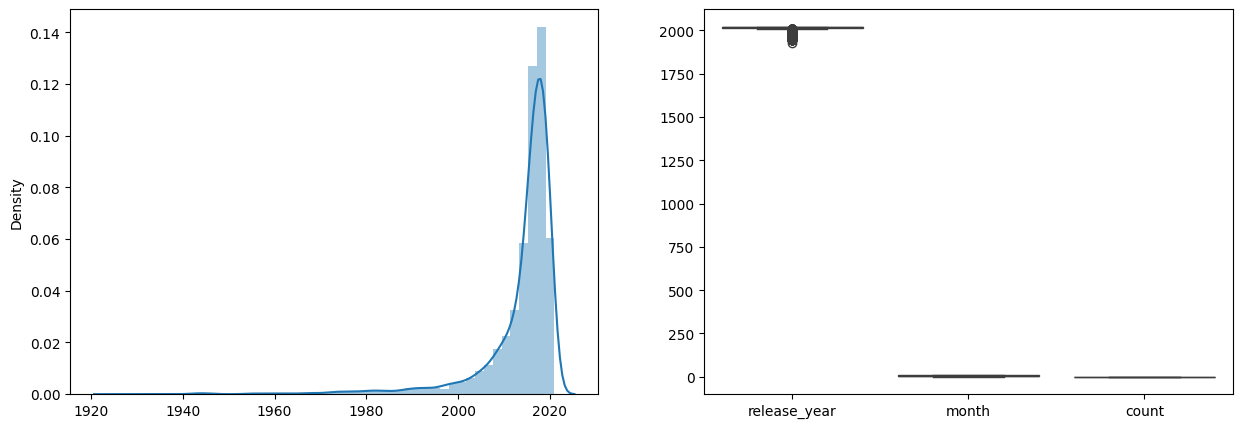

In [57]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x= df1['release_year'], ax=ax[0])
sns.boxplot(data= df1, ax=ax[1])

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Handling Outliers**
* Except for the release year, almost all of the data are presented in text format.
* The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

## **6. Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### **What is textual data preprocessing?**
* Textual data preprocessing is the process of preparing text data for analysis or modeling. It includes a series of steps that are applied to raw text data in order to clean, organize and standardize it so that it can be easily analyzed or used as input for natural language processing or machine learning models. The preprocessing steps typically include tokenization, stop-word removal, stemming or lemmatization, lowercasing, removing punctuation, and removing numbers. The goal of textual data preprocessing is to prepare the data for further analysis and modeling by removing irrelevant information and standardizing the format of the text. This can help improve the accuracy and effectiveness of the analysis or modeling.

#### **Modeling Approach**
1.   Choose the attributes that you want to cluster.
2.   Text Preprocessing: Change all textual data to lowercase and eliminate all punctuation marks and stopwords. Removing commonly occurring words such as "the", "and", "a", etc. that don't carry much meaning.
3.   Stemming or Lemmatization: Normalizing the words by reducing them to their base form.
4.   Tokenization: Breaking the text into smaller units, such as sentences or words.
5.   Dimensionality reduction.
6.   Make use of various algorithms to cluster the movies and various techniques to determine the optimal number of clusters.
7.   Build the optimal number of clusters and use wordclouds to display the contents of each cluster.

#### 1. Selecting Attributes

In [59]:
# attributes selection
df1.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%                 NA   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  month target_ages  count  
0  In a future where the elite inhabit an island ...      8      Adults      1  
1  After a devastating earthquake hits Mexico Cit...     12      Adults      1  
2  When an army recruit is found dead, his fellow...     12      Adults      1

We will cluster the Netflix movies and TV shows into groups based on the following textual characteristics:
* Director
* Cast
* Country
* Rating
* Listed in (genres)
* Description

In [60]:
# creating tags column using all text column which one is used for model building purpose.

df1['text_data'] = df1['director'] + df1['cast'] + df1['country'] + \
                     df1['rating'] + df1['listed_in'] + df1['description']


In [61]:
# checking the first row
df1['text_data'][0]

'NAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

* We were able to successfully consolidate all of the required data into a single column.

#### 2. Lower Casing

Lowercasing: It is the process of converting all the words in a text to lowercase. This can be useful in tasks such as information retrieval or text classification where case differences are not important and also can reduce the size of the vocabulary making it easier to work with larger texts or texts in languages with a high number of inflected forms.

In [62]:
# Lower Casing
def lower_case(text) :
  text = [word.lower() for word in text.split()]
  return " ".join(text)


In [63]:
# applying lower case function
df1['text_data'] = df1['text_data'].apply(lower_case)

In [64]:
# checking the first row after the process
df1['text_data'][0]

'najoão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibraziltv-mainternational tv shows, tv dramas, tv sci-fi & fantasyin a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 3. Removing Punctuations

Removing punctuation is the process of removing any punctuation marks (e.g., periods, commas, exclamation points, etc.) from text data. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis, as punctuation marks often do not carry much meaning and can add noise to the data. Removing punctuation can also make it easier to tokenize text into words or sentences, as punctuation marks often act as delimiters between words or sentences. Additionally, removing punctuation can also help in reducing the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms. It can be done using python libraries such as string, re, and nltk.

In [65]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [66]:
# Remove Punctuations
# applying remove_punctuation function
df1['text_data'] = df1['text_data'].apply(remove_punctuation)

In [67]:
# checking the first row after the process
df1['text_data'][0]

'najoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi  fantasyin a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### 4. Removing URLs .

In [68]:
# Remove URLs
def remove_url(text) :
  words = text.split()
  filtered_words = [word for word in words if not (word.startswith("http://") or word.startswith("https://") or word.startswith("www."))]
  text_without_url = ' '.join(filtered_words)
  return text_without_url

In [69]:
# apply remove_url function
df1['text_data'] = df1['text_data'].apply(remove_url)

In [70]:
# checking the first row after the process
df1['text_data'][0]

'najoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi fantasyin a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### 5. Removing Stopwords

Stop words Removal: Words such as "a," "an," "the," and "is," are words that are commonly used in a language but do not convey much meaning. These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.

In [71]:
# Remove Stopwords
# create a set of English stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [72]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [73]:
# apply stopwords function
df1['text_data'] = df1['text_data'].apply(stopwords)

In [74]:
# checking the first row after the process
df1['text_data'][0]

'najoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

### 6. white - space

Removing white spaces from text data is essential for normalization, reducing dimensionality, and improving model performance in natural language processing tasks. It enhances readability, avoids tokenization issues, and ensures data consistency, making text analysis more accurate and efficient.

In [75]:
# Remove White spaces
def remove_white_space (text) :
  text_without_space = text.replace(" ", "")
  return text_without_space

In [76]:
# apply remove white space function
df1['text_data'] = df1['text_data'].apply(remove_white_space)

In [77]:
# checking the first row after the process
df1['text_data'][0]

'najoãomiguelbiancacomparatomichelgomesrodolfovalentevanezaoliveirarafaellozanovivianeportomelfronckowiaksergiomambertizezémottacelsofrateschibraziltvmainternationaltvshowstvdramastvscififantasyinfutureeliteinhabitislandparadisefarcrowdedslumsgetonechancejoin3savedsqualor'

#### 7. Tokenization

In [78]:
# Tokenization

import nltk
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')

# Function to replace words with synonyms
def replace_synonyms(text):
    tokens = nltk.word_tokenize(text)
    synonyms = []
    for token in tokens:
        syns = wordnet.synsets(token)
        if syns:
            synonyms.append(syns[0].lemmas()[0].name())
        else:
            synonyms.append(token)
    return ' '.join(synonyms)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [79]:
# apply tokenization function
df1['text_data'] = df1['text_data'].apply(replace_synonyms)

In [80]:
# checking the first row after the process
df1['text_data'][0]

'najoãomiguelbiancacomparatomichelgomesrodolfovalentevanezaoliveirarafaellozanovivianeportomelfronckowiaksergiomambertizezémottacelsofrateschibraziltvmainternationaltvshowstvdramastvscififantasyinfutureeliteinhabitislandparadisefarcrowdedslumsgetonechancejoin3savedsqualor'

#### 8. Text Normalization

Stemming is the process of reducing a word to its base or root form. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis. The goal of stemming is to reduce words to their base form so that words with the same stem are treated as the same word, even if they are written in different forms. For example, stemming would reduce "running," "runner," and "ran" to the base form "run." This can be useful in tasks such as information retrieval or text classification where the specific form of a word is not important, and it can also help in reducing the size of the vocabulary. There are several stemmers available in python such as Porter stemmer, Snowball stemmer and Lancaster stemmer.

We will utilize SnowballStemmer to construct a meaningful word from a word corpus.

In [81]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem.snowball import SnowballStemmer

# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming
def stemming(text) :
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [82]:
# apply stemming function
df1['text_data'] = df1['text_data'].apply(stemming)

In [83]:
# checking the first row after the process
df1['text_data'][0]

'najoãomiguelbiancacomparatomichelgomesrodolfovalentevanezaoliveirarafaellozanovivianeportomelfronckowiaksergiomambertizezémottacelsofrateschibraziltvmainternationaltvshowstvdramastvscififantasyinfutureeliteinhabitislandparadisefarcrowdedslumsgetonechancejoin3savedsqualor'

##### Which text normalization technique have you used and why?

Here we have used snowball stemming technique. Because Snowball stemming is designed to accurately reduce words to their root or base form, which helps in improving the accuracy of text analysis tasks such as information retrieval, text classification, and sentiment analysis. It provides a balance between accuracy and speed, allowing for faster processing of text data compared to more complex stemming algorithms. Also Snowball stemming is robust against different word variations and linguistic phenomena, such as inflections, plurals, and derivational suffixes.

#### 9. Text Vectorization

Text vectorization is the process of converting text data into numerical vectors or feature representations that can be used for machine learning or data analysis tasks. In simple terms, it transforms the text data into numerical data which can be easily processed by machine learning algorithms. There are several text vectorization techniques available such as bag of words, Tf-idf, Word2vec, and GloVe etc.

* We will be using the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency
* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document). The more often a word appears in a document, the higher its TF score.
* IDF(t) = IDF measures how rare a word is across all the documents in the corpus. The rarer a word, the higher its IDF score.
* The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.

In [84]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# create an object with tfidf vectorizor
tfidf = TfidfVectorizer(stop_words= 'english', lowercase= False, max_features= 10000)  # max_feature 10000 to prevent system from crashing

# fit the vctorizer using text data
tfidf.fit(df1['text_data'])

# collect the vocabulary items used in vectorizer
dictionary = tfidf.vocabulary_.items()


In [85]:
# number of independent features created from "text_data" column
print(len(dictionary))

9029


In [86]:
# convert vector into array form for clustering
vector = tfidf.transform(df1['text_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 9029)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

Here, I have used tfidf vectorizer technique. Because -


*  It accurately represents the importance of terms in documents by considering both their frequency and rarity across the corpus.
*   It reduces the dimensionality of the feature space by focusing on relevant terms while disregarding common words, enhancing computational efficiency and model performance.
*   TF-IDF is language-independent, making it suitable for multilingual text analysis.
*    It highlights discriminative terms, aiding tasks like document classification and information retrieval.





### 4. Feature Manipulation & Selection

### 5. Data Transformation

### 6. Data Scaling

In [87]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while retaining as much information as possible. The main goal of dimensionality reduction is to simplify the data while minimizing the loss of information. It is a crucial step in machine learning and data analysis as it can help to improve the performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

* There are several techniques used for dimensionality reduction, such as:
Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Autoencoder, and Random Projection etc.
* We will use Principal Component Analysis (PCA) to reduce the dimensionality of data.

In [88]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

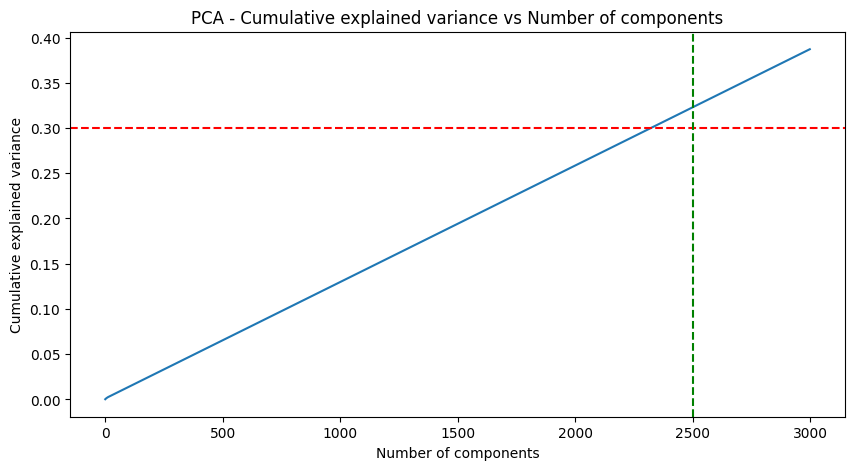

In [120]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.3, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

In [102]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [103]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7770, 3000)

### 8. Data Splitting

In [90]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [91]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### **7.1 K-Means Clustering**

K-means clustering is a popular unsupervised machine learning technique used to group similar data points together. The goal of k-means clustering is to partition a dataset into k clusters, where each cluster contains similar data points and is represented by its centroid.

The k-means algorithm works by first randomly selecting k centroids, one for each cluster. Then, it assigns each data point to the cluster whose centroid is closest to it. This process is repeated until the assignment of data points to clusters no longer changes, or until a maximum number of iterations is reached.

* We will determine the best number of clusters for the K-means clustering algorithm by visualizing the elbow curve and silhouette score.

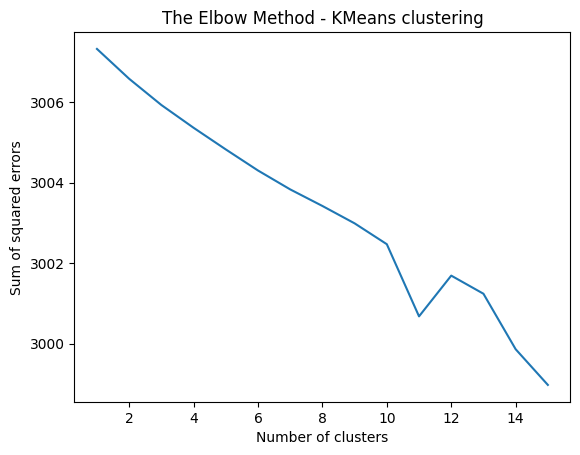

In [105]:
'''Elbow method to find the optimal value of K'''

# Initialize a list to store the sum of squared errors for each value of K
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.

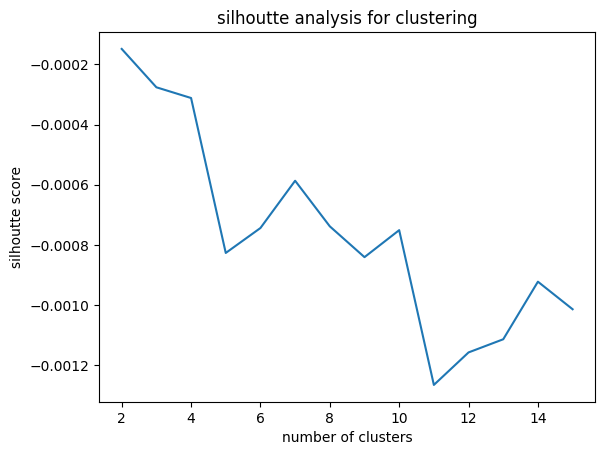

In [114]:
# initialize a list to store the silhoutte score for each value of k
silhoutte_avg = []

for k in range(2,16) :
  # initialize kmeans value for value of k
  kmeans = KMeans(n_clusters= k, init = 'k-means++', random_state = 42)
  # fit the model
  kmeans.fit(X)
  # predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # compute the silhoutte score for the model
  score = silhouette_score(X, labels)
  silhoutte_avg.append(score)

# plot the silhoutte analysis
plt.plot(range(2, 16), silhoutte_avg)
plt.xlabel('number of clusters')
plt.ylabel('silhoutte score')
plt.title('silhoutte analysis for clustering')
plt.show()

In [122]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [123]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(3005.9348127965623, -0.00027629412504448107)


In [124]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

In [125]:
df1.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

type                             title         director  \
3806    Movie                       Lucid Dream    Jun-seong Kim   
6459    Movie                      The Holy Man   Note Chern-Yim   
6802  TV Show                      The Rap Game               NA   
3134    Movie  Jeff Dunham: Arguing with Myself  Manny Rodriguez   
4237  TV Show                 Mother Goose Club               NA   

                                                   cast        country rating  \
3806  Ko Soo, Kyung-gu Seol, Yu-chun Park, Hye-jung ...    South Korea  TV-MA   
6459  Pongsak Pongsuwan, Note Chern-Yim, Sarawut Phu...       Thailand  TV-14   
6802                                     Jermaine Dupri  United States  TV-14   
3134                                        Jeff Dunham  United States  TV-MA   
4237                                                 NA  United States   TV-Y   

                                              listed_in  \
3806  International Movies, Sci-Fi & Fantasy, Thrillers   
6459  Comedies, Faith & Spirituality, International ...   
6802                                         Reality TV   
3134                                    Stand-Up Comedy   
4237                                           Kids' TV   

                                            description  kmeans_cluster  
3806  After searching for his abducted son for three...               0  
6459  Formerly a troubled youth, a monk is given cha...               1  
6802  Young lyricists between the ages of 12 and 16 ...               2  
3134  Playing straight man to partners half his size...               0  
4237  Classic nursery rhymes and children's songs ge...               0

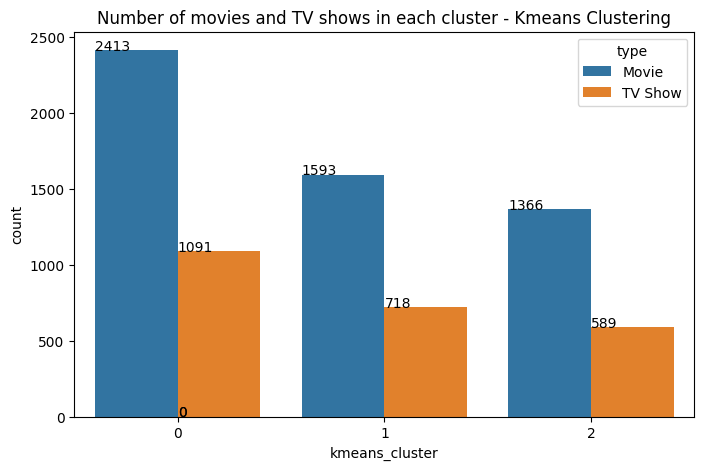

In [126]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

#### **Building wordclouds for different clusters in K-Means Clustering**

In [127]:
def kmeans_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  netflix_df_wordcloud = df1[['kmeans_cluster',column_name]].dropna()
  netflix_df_wordcloud = netflix_df_wordcloud[netflix_df_wordcloud['kmeans_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in netflix_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

### 7.2 Word Cloud on "description" column for different cluster

cluster 0


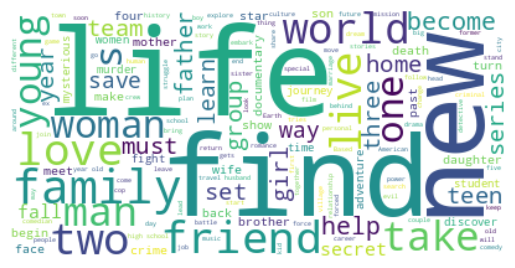

cluster 1


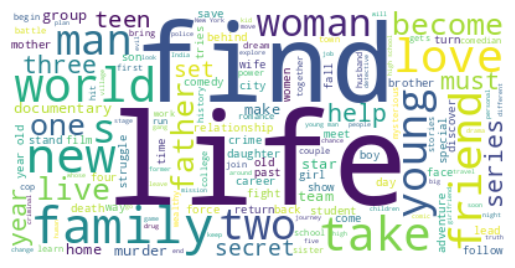

cluster 2


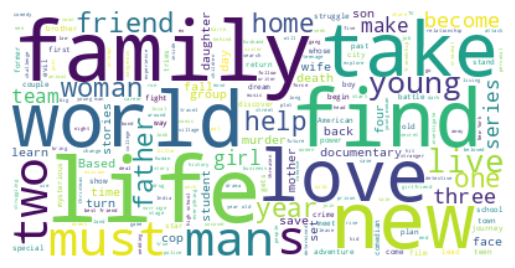

In [128]:
for i in range(3) :
  print(f'cluster {i}')
  kmeans_worldcloud(i,  "description")

### 7.3 Word Cloud on "cast" column for different cluster

cluster 0


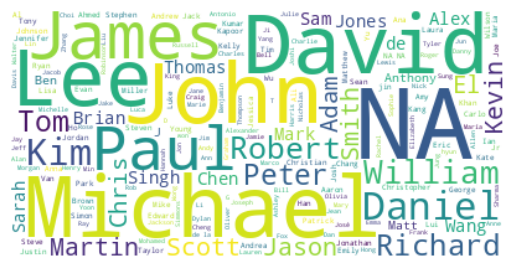

cluster 1


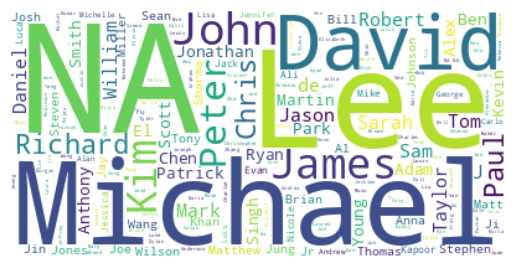

cluster 2


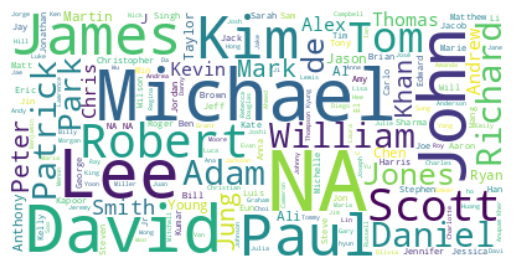

In [129]:
for i in range(3) :
  print(f'cluster {i}')
  kmeans_worldcloud(i,  "cast")

### 7.4 Word Cloud on "director" column for different cluster

cluster 0


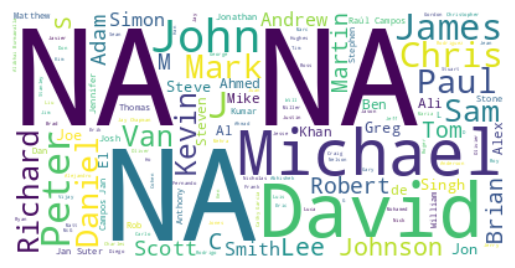

cluster 1


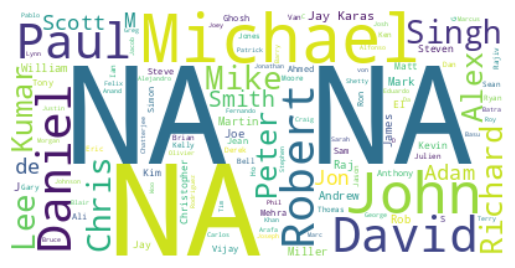

cluster 2


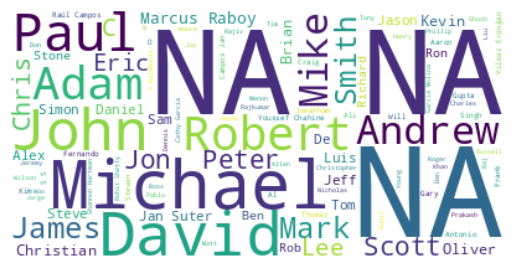

In [130]:
for i in range(3) :
  print(f'cluster {i}')
  kmeans_worldcloud(i,  "director")

### 7.5 Word Cloud on "country" column for different cluster

cluster 0


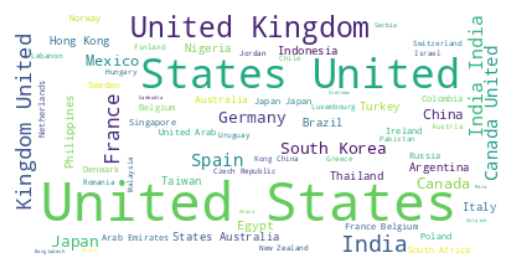

cluster 1


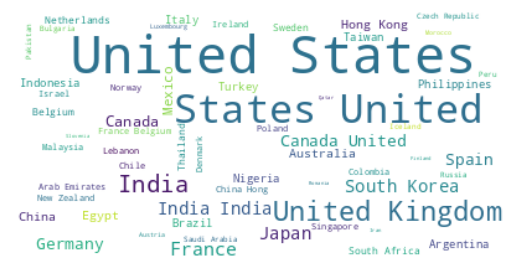

cluster 2


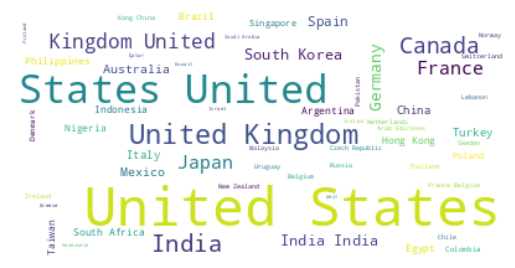

In [131]:
for i in range(3) :
  print(f'cluster {i}')
  kmeans_worldcloud(i,  "country")

### ML Model - 2

### **Hierarchical clustering**

Hierarchical clustering is a method of clustering data points into a tree-like structure. It is an alternative method to k-means clustering and it is used to group similar data points together in a hierarchical fashion.

There are two main types of Hierarchical clustering: Agglomerative and Divisive. Agglomerative is a bottom-up approach where each data point is considered as a separate cluster and the algorithm iteratively merges the closest clusters. On the other hand, Divisive is a top-down approach where all data points are considered as a single cluster and the algorithm iteratively splits the clusters.

The hierarchical clustering algorithm can be represented by a dendrogram which makes it easy to visualize the structure of the clusters.

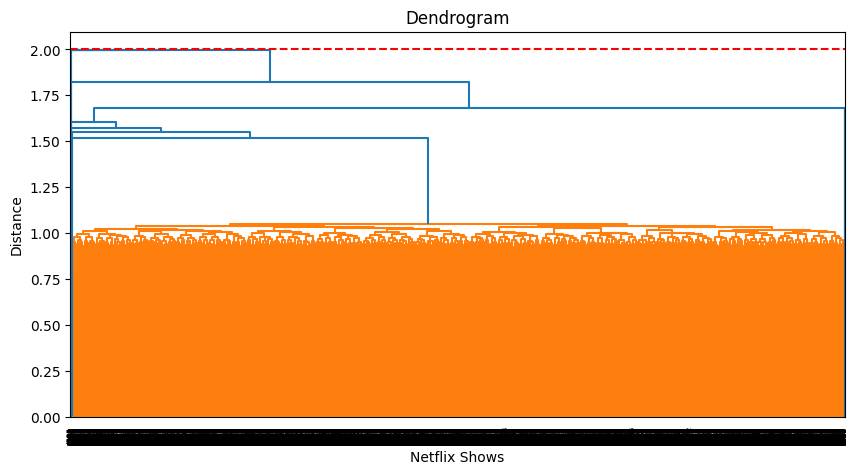

In [133]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 2, color='r', linestyle='--')

In [138]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
# Adding a hierarchical cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

In [140]:
df1.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

type                              title  \
2425  TV Show                           Girlboss   
1505    Movie  Countdown to Death: Pablo Escobar   
6776    Movie                    The Prince & Me   
6942    Movie                          The Tribe   
1895    Movie                             Duniya   

                                director  \
2425                                  NA   
1505  Santiago Diaz, Pablo Martin Farina   
6776                     Martha Coolidge   
6942                     Fernando Colomo   
1895                       Ramesh Talwar   

                                                   cast  \
2425  Britt Robertson, Ellie Reed, Johnny Simmons, A...   
1505                                                 NA   
6776  Julia Stiles, Luke Mably, Ben Miller, Miranda ...   
6942  Paco León, Carmen Machi, Luis Bermejo, Maribel...   
1895  Dilip Kumar, Rishi Kapoor, Pran, Amrita Singh,...   

                            country rating  \
2425                  United States  TV-MA   
1505                  United States  TV-MA   
6776  United States, Czech Republic     PG   
6942                          Spain  TV-MA   
1895                          India  TV-14   

                                             listed_in  \
2425                                       TV Comedies   
1505               Documentaries, International Movies   
6776                         Comedies, Romantic Movies   
6942                    Comedies, International Movies   
1895  Action & Adventure, Dramas, International Movies   

                                            description  hierarchical_cluster  
2425  Rebellious and broke, Sophia stumbles into cre...                     0  
1505  Through rare interviews, images and wiretap au...                     0  
6776  A hardworking Wisconsin college student falls ...                     0  
6942  An executive-turned-viral sensation loses his ...                     0  
1895  A lawyer defends his childhood friend – and gi...                     0

Text(0.5, 1.0, 'Number of movies and tv shows in each cluster - Hierarchical Clustering')

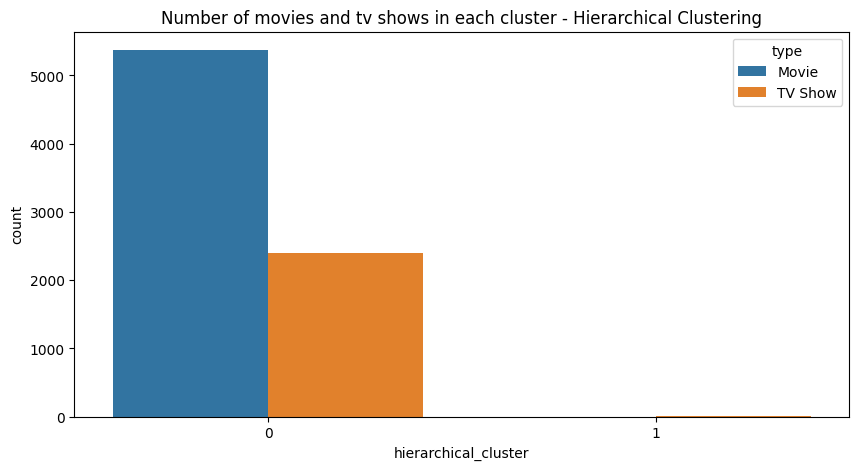

In [141]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data= df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

#### **Building wordclouds for different clusters in hierarchical Clustering**

In [142]:
def hierarchical_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  netflix_df_wordcloud = df1[['hierarchical_cluster',column_name]].dropna()
  netflix_df_wordcloud = netflix_df_wordcloud[netflix_df_wordcloud['hierarchical_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in netflix_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Word Cloud on "title" column for different cluster

cluster 0


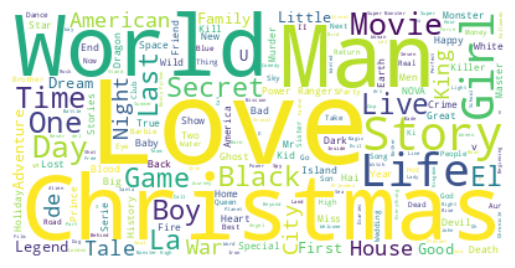

cluster 1


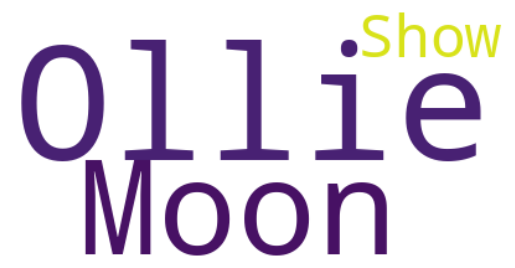

In [144]:
for i in range(2):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

Word Cloud on "description" column for different cluster

cluster 0


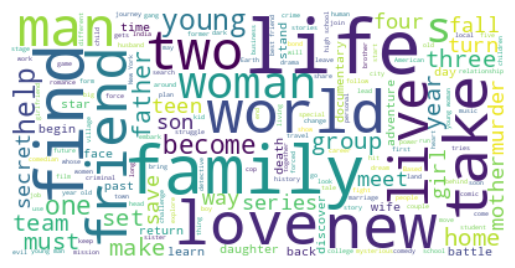

cluster 1


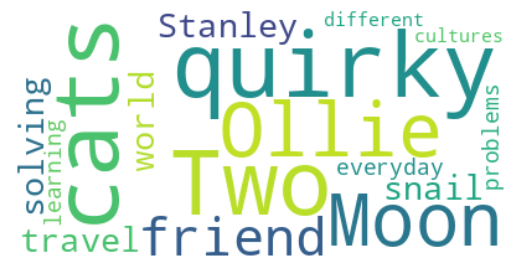

In [145]:
for i in range(2):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'description')

Word Cloud on "cast" column for different cluster

cluster 0


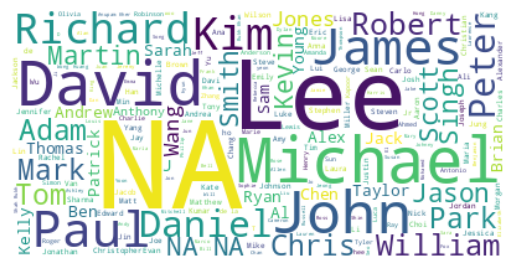

cluster 1


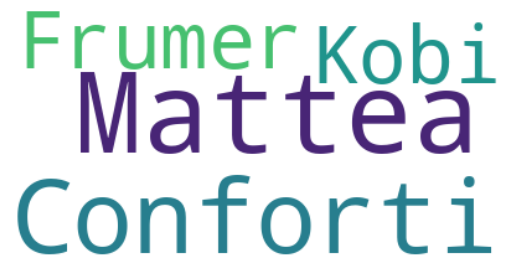

In [146]:
for i in range(2):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')

Word Cloud on "country" column for different cluster

cluster 0


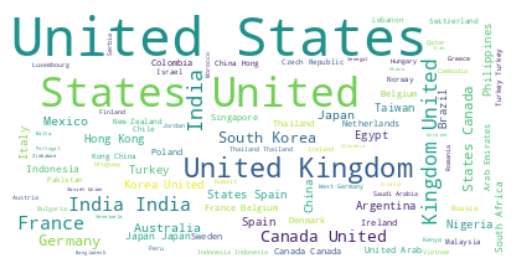

cluster 1


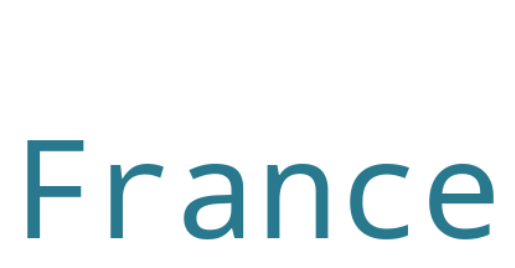

In [148]:
for i in range(2):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'country')

Answer Here.

### ML Model - 3

## **8. Recommendation System**

A content-based recommendation system is a type of recommendation system that suggests items to users based on their similarity to other items that the user has shown interest in. It uses the attributes or features of the items to determine the similarity between them.

* Based on how similar the movies and shows are, we can create a straightforward content-based recommender system.
* The recommender system needs to be able to suggest a list of similar shows that a person who has watched a show on Netflix likes.
* We can use cosine similarity to determine the shows' similarity scores.
* By dividing the dot product of the two vectors by their magnitude values, the similarity between A and B can be calculated. Simply put, the angle between two vectors decreases as the cosine similarity score increases.

In [149]:
# veryfying index
df1[['show_id', 'title', 'text_data']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7782   s7783                                     Zozo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                              text_data  
0     najoãomiguelbiancacomparatomichelgomesrodolfov...  
1     jorgemichelgraudemiánbichirhéctorbonillaoscars...  
2     gilbertchanteddchanstellachunghenleyhiilawrenc...  
3     shaneackerelijahwoodjohncreillyjenniferconnell...  
4     robertluketicjimsturgesskevinspaceykateboswort...  
...                                                 ...  
7782  joseffaresimadcreidiantoinetteturkeliasgergica...  
7783  mozezsinghvickykaushalsarahjanediasraaghavchan...  
7784  nanastycunitedstatestvmadocumentariesinternati...  
7785  naadrianozumborachelkhooaustraliatvpginternati...  
7786  samdunnnaunitedkingdomcanadaunitedstatestvmado...  

[7770 rows x 3 columns]

* Our dataframe has a total of 7770 rows, as shown above, and the last index is 7786 due to the deletion of some rows while treating null values.

* In order to construct a content-based recommendation system, we determine the similarity score based on a specific index_id for that particular "tags" column.

* If we are unable to reset the index, there is a good chance that instead of providing an index, we will calculate cosine similarity for another index. in order to avoid this issue and properly address index when developing the recommendation system. The index was simply reset.

In [150]:
# defining new dataframe for building recommandation system
recommender_df = df1.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly
recommender_df[['show_id', 'title', 'text_data']]


show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7765   s7783                                     Zozo   
7766   s7784                                   Zubaan   
7767   s7785                        Zulu Man in Japan   
7768   s7786                    Zumbo's Just Desserts   
7769   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                              text_data  
0     najoãomiguelbiancacomparatomichelgomesrodolfov...  
1     jorgemichelgraudemiánbichirhéctorbonillaoscars...  
2     gilbertchanteddchanstellachunghenleyhiilawrenc...  
3     shaneackerelijahwoodjohncreillyjenniferconnell...  
4     robertluketicjimsturgesskevinspaceykateboswort...  
...                                                 ...  
7765  joseffaresimadcreidiantoinetteturkeliasgergica...  
7766  mozezsinghvickykaushalsarahjanediasraaghavchan...  
7767  nanastycunitedstatestvmadocumentariesinternati...  
7768  naadrianozumborachelkhooaustraliatvpginternati...  
7769  samdunnnaunitedkingdomcanadaunitedstatestvmado...  

[7770 rows x 3 columns]

* As shown in the dataframe above, the index was successfully reset. The dataset can now be used to construct a content-based recommendation system.

In [151]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [153]:
print(f"before reset index id for movie 'Zero' : {df1[df1['title'] == 'Zozo'].index[0]}")
print(f"after reset index id for movie 'Zero': {recommender_df[recommender_df['title'] == 'Zozo'].index[0]}")

before reset index id for movie 'Zero' : 7782
after reset index id for movie 'Zero': 7765


In [154]:
# calling out transformed array independent features created from text_data(cluster) column after performing PCA for dimenssionality reduction.
X

array([[-3.64418960e-04, -3.60578353e-07,  6.20309268e-04, ...,
        -6.56870109e-03, -9.57771945e-03, -2.47083351e-03],
       [ 4.78221759e-04,  6.83001573e-04, -1.21943829e-04, ...,
         4.91715137e-03,  7.64575093e-03,  2.94925243e-02],
       [ 3.84944463e-04, -7.86763775e-04,  2.01602002e-04, ...,
        -5.74630652e-03,  1.44519324e-02, -1.61881948e-02],
       ...,
       [-6.18722080e-04,  7.62926026e-04, -5.90028368e-04, ...,
         1.31933077e-03, -1.10938729e-02, -1.06963107e-03],
       [-2.23721199e-04, -6.89027567e-05, -2.90865912e-04, ...,
        -7.95449363e-03, -1.87703181e-02, -2.21030429e-02],
       [-9.01245751e-04, -2.05155978e-04,  5.42604467e-04, ...,
         1.43905852e-02, -8.67532728e-03, -7.05676465e-03]])

In [155]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        , -0.00582478,  0.01546803, ...,  0.01290856,
        -0.01259608,  0.00348428],
       [-0.00582478,  1.        , -0.01007742, ..., -0.0135134 ,
         0.02527472, -0.00127273],
       [ 0.01546803, -0.01007742,  1.        , ..., -0.03222672,
        -0.00568042, -0.00197087],
       ...,
       [ 0.01290856, -0.0135134 , -0.03222672, ...,  1.        ,
        -0.00973736, -0.01588128],
       [-0.01259608,  0.02527472, -0.00568042, ..., -0.00973736,
         1.        , -0.01177349],
       [ 0.00348428, -0.00127273, -0.00197087, ..., -0.01588128,
        -0.01177349,  1.        ]])

In [156]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df1.iloc[i[0]].title)

In [157]:
recommend('Golmaal: Fun Unlimited')

If you liked 'Golmaal: Fun Unlimited', you may also enjoy: 

Lucha: Playing the Impossible
Calico Critters Mini Episodes Clover
How It Ends
Half & Half
Dark Desire
17 Again
Good Game: The Beginning
Suckseed
Darna Mana Hai
W/O Ram


In [158]:
recommend('Breaking Bad')

If you liked 'Breaking Bad', you may also enjoy: 

Power Rangers Super Megaforce
Atelier
Harud
Capital in the Twenty-First Century
Loaded
Vientos de agua
Moon
Raja Hindustani
Aruna & Her Palate
The Sapphires


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

# **Conclusion**

Write the conclusion here.

In this project, we tackled a text clustering problem in which we had to categorize and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are not.

* There were approximately 7787 records and 11 attributes in the dataset.
* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).
* It was discovered that Netflix hosts more movies than television shows on its platform, and the total number of shows added to Netflix is expanding at an exponential rate. Additionally, most of the shows were made in the United States.
* The attributes were chosen as the basis for the **clustering of the data: cast, country, genre, director, rating, and description** The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.
* **10000 attributes** in total were created by **TFIDF vectorization**.
The problem of dimensionality was dealt with through the **use of Principal Component Analysis (PCA). Because 3000 components were able to account for more than 80% of the variance**, the total number of components was limited to 3000.
* Utilizing the **K-Means Clustering algorithm**, we first constructed clusters, and the **optimal number of clusters was determined to be 6**. The **elbow method and Silhouette score analysis** were used to get this.
* The **Agglomerative clustering algorithm** was then used to create clusters, and the **optimal number of clusters was determined to be 7**. This was obtained after visualizing the **dendrogram**.
* The similarity matrix generated by applying **cosine similarity** was used to construct a **content-based recommender system**. The user will receive ten recommendations from this recommender system based on the type of show they watched.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***